# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 1. Cвойства оценок
### Дедлайн --- 5 октября 9:00

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в <a href=https://docs.google.com/document/d/1kd85QRAS8fbxRxpMzP2IsbQ_YcVsU-Aczqd6ErXgIDg/edit#>этой папке</a>.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Каждая задача оценивается в 10 баллов.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns

sns.set(style='darkgrid')
%matplotlib inline

Зафиксируем `seed` для воспроизводимости.

In [2]:
np.random.seed(42)

### Задача 1

Сгенерируйте выборку $X_1, \dots, X_N$ из равномерного распределения на отрезке $[0, \theta]$ для $N = 10^4$.

In [3]:
N = 1e4  # use this

theta = 1
u_sample = sps.uniform.rvs(0, theta, size=int(N))
u_sample

array([0.37454012, 0.95071431, 0.73199394, ..., 0.94670792, 0.39748799,
       0.2171404 ])

Для всех $n \leqslant N$ посчитайте оценки параметра $\theta$ из теоретической задачи: $2\overline{X}, \; \overline{X} + X_{(n)}/ 2, \; (n+1)X_{(1)}, \; X_{(1)}+X_{(n)}, \; \frac{n+1}{n} X_{(n)}$. Используйте векторные операции.

__Подсказка:__ Могут быть полезными функции `np.arange`, `np.cumsum`, `np.maximum.accumulate` и `np.minimum.accumulate`

In [4]:
class Estimate:
    
    def __init__(self, data, formula):
        self.data = data
        self.formula = formula


class Estimator:
    
    def __init__(self, estimator_function, formula):
        self._estimator_function = estimator_function
        self._formula = formula
    
    def __call__(self, sample):
        return Estimate(self._estimator_function(sample), self._formula)

In [5]:
def double_mean_estimator_func(sample):
    return 2 * (np.cumsum(sample) / np.arange(1, len(sample) + 1))

In [6]:
def mean_plus_half_max_estimator_func(sample):
    return (np.cumsum(sample) / np.arange(1, len(sample) + 1)) + (np.maximum.accumulate(sample) / 2)

In [7]:
def n_plus_1_min_estimator_func(sample):
    return (np.arange(1, len(sample) + 1) + 1) * np.minimum.accumulate(sample)

In [8]:
def min_plus_max_estimator_func(sample):
    return np.minimum.accumulate(sample) + np.maximum.accumulate(sample)

In [9]:
def n_plus_1_to_n_max_estimator_func(sample):
    return ((np.arange(1, len(sample) + 1) + 1) / np.arange(1, len(sample) + 1)) * np.maximum.accumulate(sample)

In [10]:
estimators = {
    'double_mean': Estimator(double_mean_estimator_func, r'$2\overline{X}$'),
    'mean_plus_half_max': Estimator(mean_plus_half_max_estimator_func, r'$\overline{X} + X_{(n)}/2$'),
    'n_plus_1_min': Estimator(n_plus_1_min_estimator_func, r'$(n+1)X_{(1)}$'),
    'min_plus_max': Estimator(min_plus_max_estimator_func, r'$X_{(1)}+X_{(n)}$'),
    'n_plus_1_to_n_max': Estimator(n_plus_1_to_n_max_estimator_func, r'$\frac{n+1}{n} X_{(n)}$')
}

estimates = {name: estimator(u_sample) for (name, estimator) in estimators.items()}

for name, estimate in estimates.items():
    print(estimate.data)

[0.74908024 1.32525443 1.37149891 ... 0.98839387 0.98837452 0.98831912]
[0.56181018 1.13798437 1.16110661 ... 0.99405577 0.9940461  0.99401839]
[0.74908024 1.12362036 1.49816048 ... 0.11633592 0.11634755 0.11635919]
[0.74908024 1.32525443 1.32525443 ... 0.99972931 0.99972931 0.99972931]
[0.74908024 1.42607146 1.26761908 ... 0.99981767 0.99981766 0.99981765]


Постройте на одном графике разными цветами для всех оценок функции модуля разности оценки и истинного значения $\theta$ в зависимости от $n$. Если некоторые оценки (при фиксированном значении $n$) сильно отличаются от истинного значения параметра $\theta$, то исключите их и постройте еще один график со всеми кривыми (для измененного значения $\theta$). Для избавления от больших значений разности в начале ограничьте масштаб графика. Для наглядности точки можно соединить линиями.

Не забудьте подписать оси, а также добавить легенду к графику.

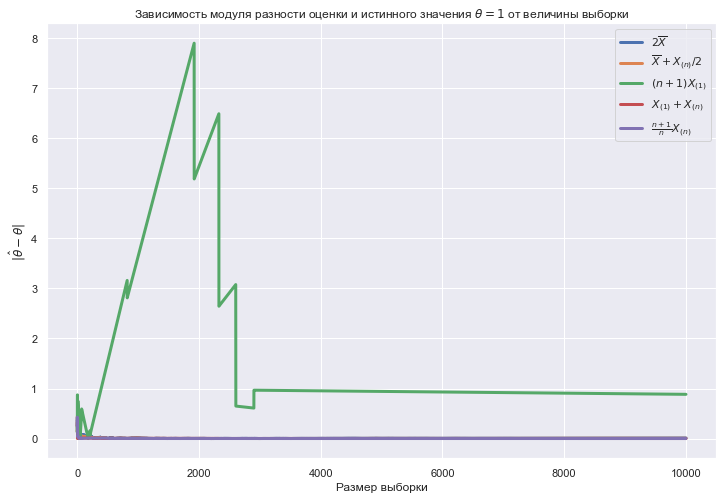

In [11]:
def plot_estimates(theta, start: int, estimates):
    plt.figure(figsize=(12, 8))
    plt.title(
        r'Зависимость модуля разности оценки и истинного значения $\theta={}$ от величины выборки'.format(theta)
    )
    plt.xlabel('Размер выборки')
    plt.ylabel(r'$|\hat\theta - \theta|$')
    for estimate in estimates.values():
        plt.plot(
            np.arange(start, N) + 1,
            np.absolute(estimate.data[start:] - np.repeat(theta, N - start)),
            lw=3,
            label=estimate.formula
        )
    plt.legend()

plot_estimates(theta, 0, estimates)

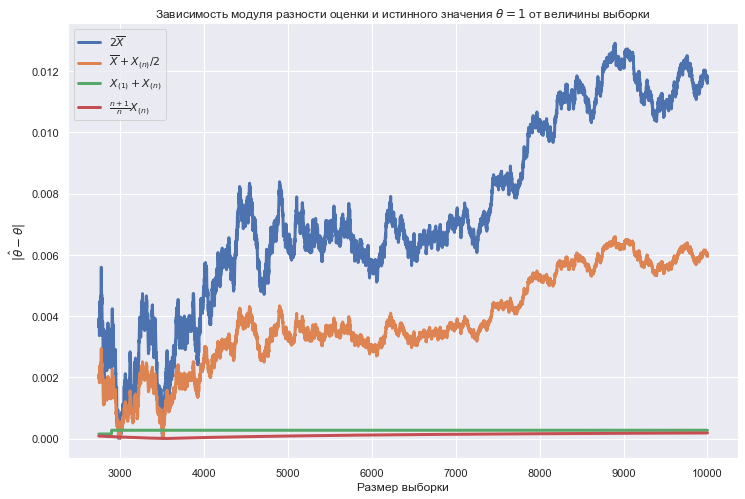

In [12]:
estimates.pop('n_plus_1_min', None)
plot_estimates(theta, 2750, estimates)

Какая оценка получилась лучше (в смысле упомянутого модуля разности при $n = N$)?

__Ответ:__ Лучшей оценкой оказалась $\frac{n+1}{n}X_{(n)}$ (на графике красным), потому что на больших выборках она ближе всех к истинному значению $\theta$ (наименьший модуль разности).



Проведите эксперимент для разных значений $\theta$ (количество графиков равно количеству значений $\theta$)

In [13]:
def conduct_experiment(theta):
    u_sample = sps.uniform.rvs(0, theta, size=int(N))
    estimates = {name: estimator(u_sample) for (name, estimator) in estimators.items()}
    plot_estimates(theta, 0, estimates)
    estimates.pop('n_plus_1_min', None)
    plot_estimates(theta, 2750, estimates)

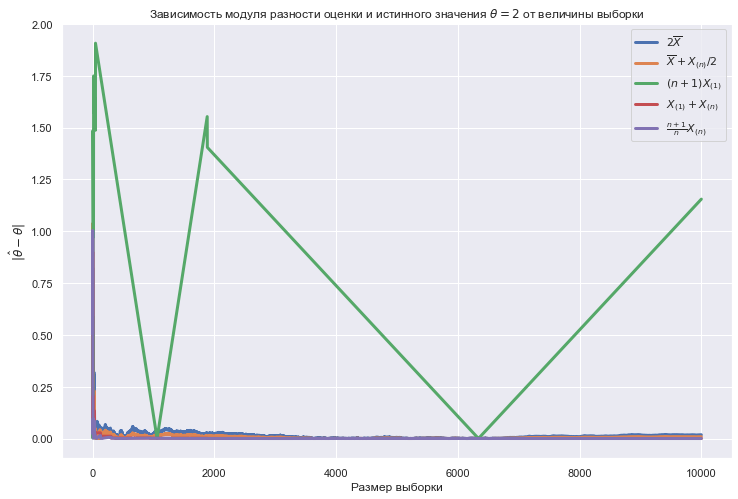

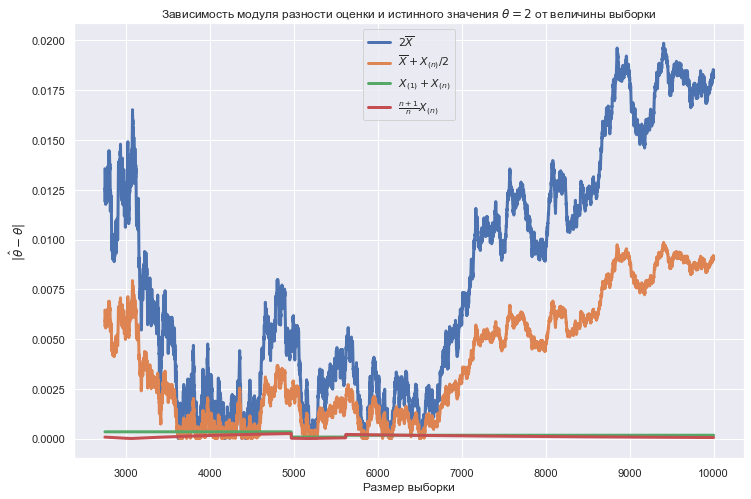

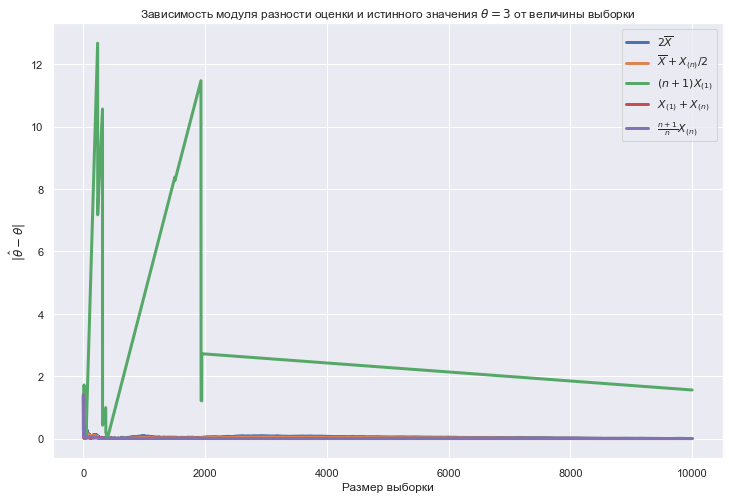

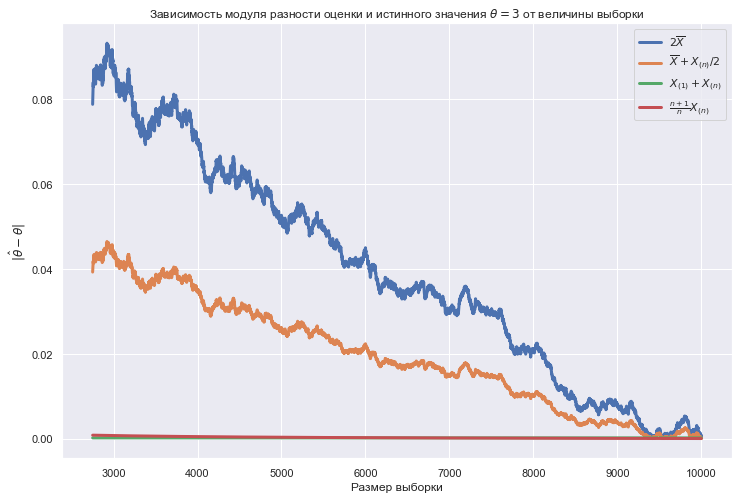

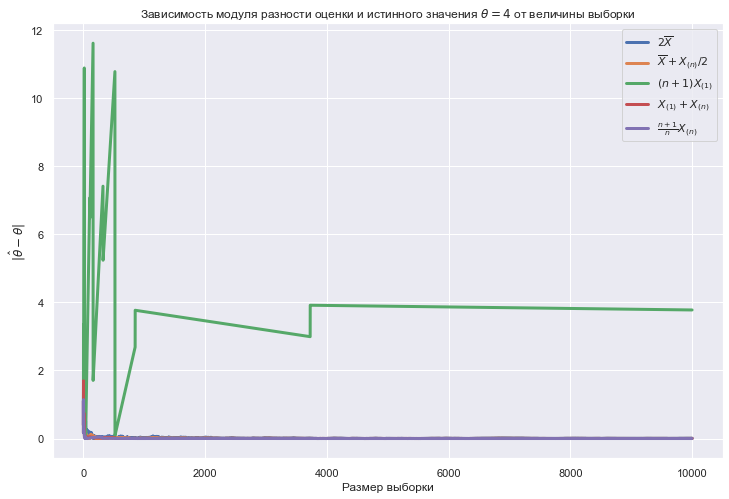

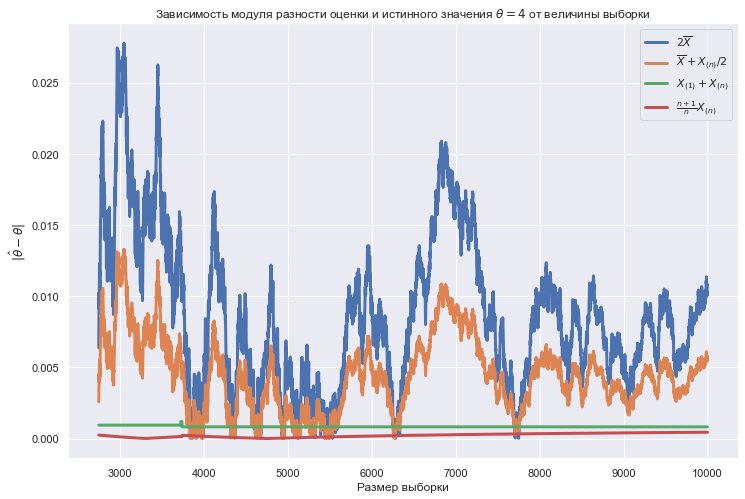

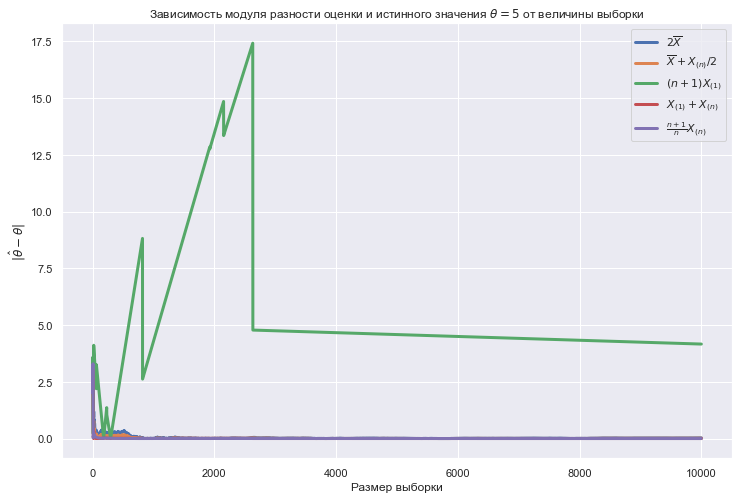

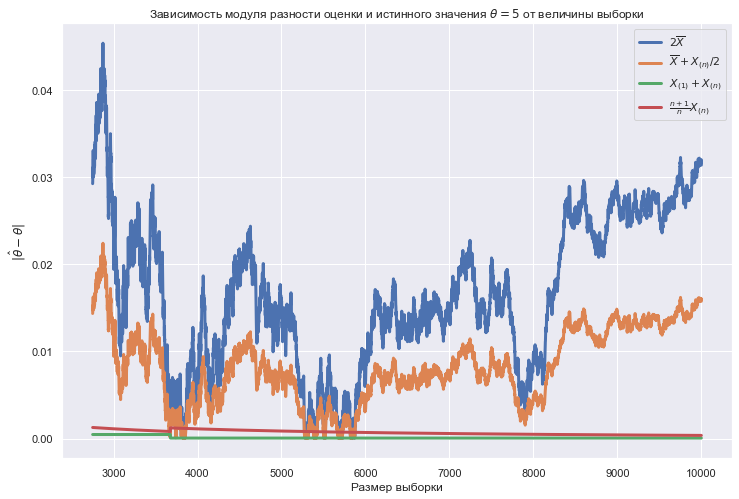

In [14]:
for theta in range(2, 6):
    conduct_experiment(theta)

Сделайте вывод.


__Вывод:__ Все хорошие оценки (те, которые слабо отклоняются от истинного значения $\theta$) -- состоятельные. Самой худшей оказалась единственная несостоятельная оценка $(n+1)X_{(1)}$. Самыми лучшими оказались оценки $X_{(1)}+X_{(n)}$ и $\frac{n+1}{n}X_{(n)}$.

### Задача 2

Сгенерируйте выборку $X_1, ..., X_N$ из экспоненциального распределения с параметром $\theta = 1$ для $N = 10^4$. 

In [15]:
N = 10000
exp_sample = sps.expon.rvs(scale=1, size=10000)
exp_sample

array([1.87886481, 0.68224096, 0.21749157, ..., 0.36337572, 0.52317241,
       0.73988957])

Для всех $n \leqslant N$ посчитайте оценку $(k!/\overline{X^k})^{1/k}$ параметра $\theta$. Проведите исследование, аналогичное предыдущей задаче, и выясните, при каком k оценка ведет себя лучше (рассмотрите не менее $10$ различных значений $k$).

In [16]:
def exp_estimator_func(sample, k):
    return (
        np.repeat(np.math.factorial(k), len(sample)) /
        (np.cumsum(sample ** k) / np.arange(1, len(sample) + 1))
    ) ** (1 / k)

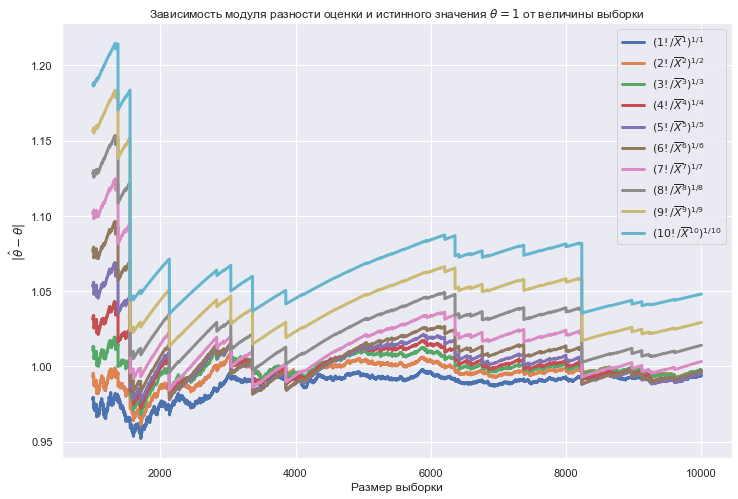

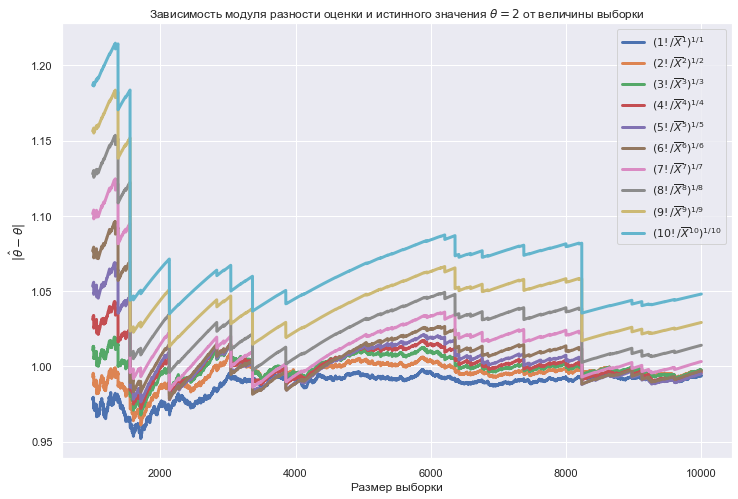

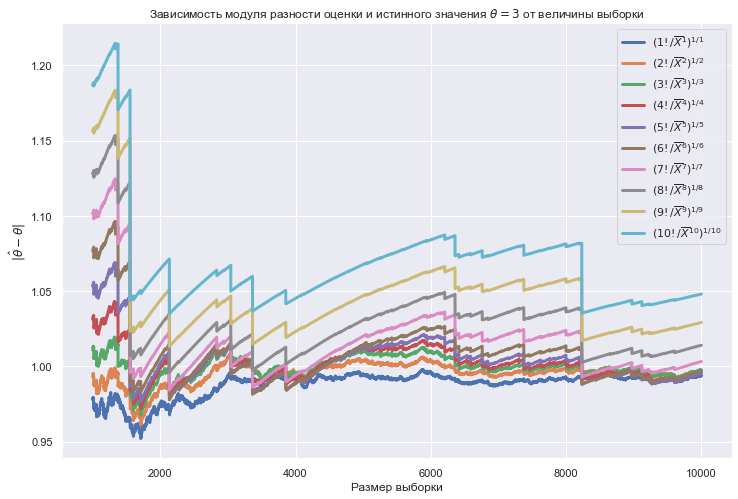

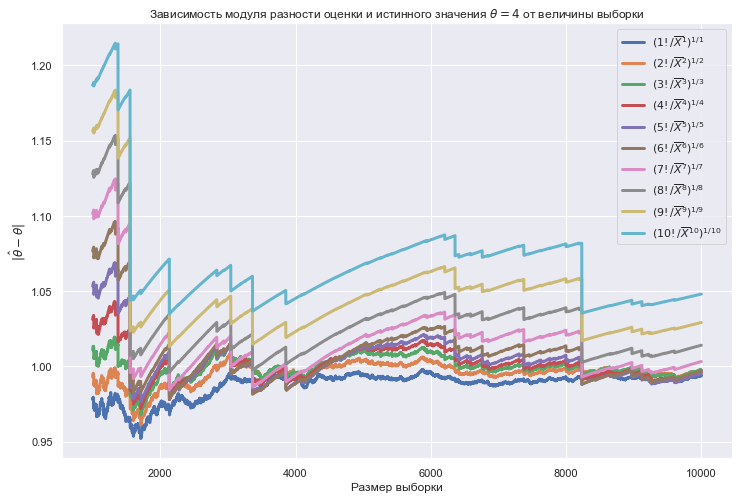

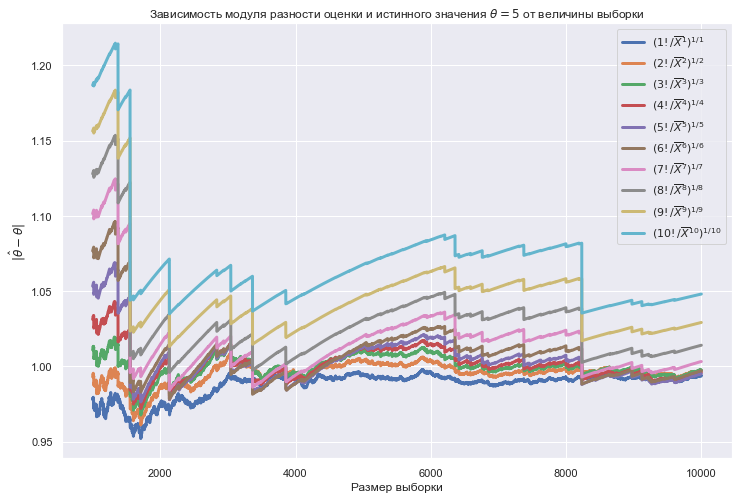

In [17]:
def plot_estimates(theta, start: int, estimates):
    plt.figure(figsize=(12, 8))
    plt.title(
        r'Зависимость модуля разности оценки и истинного значения $\theta={}$ от величины выборки'.format(theta)
    )
    plt.xlabel('Размер выборки')
    plt.ylabel(r'$|\hat\theta - \theta|$')
    for k, estimate in estimates.items():
        plt.plot(
            np.arange(start, N) + 1,
            np.absolute(estimate[start:]),
#             np.absolute(estimate[start:] - np.repeat(theta, N - start)),
            lw=3,
            label='$(%s! / \overline{X}^{%s})^{1/%s}$' % (k, k, k)
        )
    plt.legend()

def conduct_experiment(sample, theta):
    estimates = {str(k): exp_estimator_func(sample, k) for k in range(1, 11)}
    plot_estimates(theta, 1000, estimates)

for theta in range(1, 6):
    conduct_experiment(exp_sample, theta)

Сделайте вывод.


__Вывод:__ чем меньше взять значение $k$ в оценке $(k!/\overline{X^k})^{1/k}$, тем она будет лучше.

### Задача 3

Придумайте распределение, у которого конечны первые четыре момента, а пятый - нет. Сгенерируйте выборку $X_1, \dots, X_N$ из этого распределения для $N = 10^4$. 

In [18]:
N = 10 ** 4

pareto5_dist = sps.pareto(b=5)
pareto5_sample = pareto5_dist.rvs(size=N)

Постройте график плотности, а также нанесите точки выборки на график (с нулевой y-координатой)

**Подсказка**: Может быть полезен параметр `alpha` в функции `plt.plot`

In [19]:
def plot_dist_with_sample(dist, sample, num, dist_name):
    grid = np.linspace(np.min(sample), np.max(sample), num)
    plt.figure(figsize=(12, 8))
    plt.title(r'Плотность распределения {} с выборкой'.format(dist_name))
    plt.xlabel('Значения из выборки')
    plt.ylabel('Плотность распределения')
    plt.scatter(
        sample,
        np.repeat(0, len(sample)),
        marker='o',
        alpha=0.1
    )
    plt.plot(
        grid,
        dist.pdf(grid),
        color='r',
        lw=3
    )

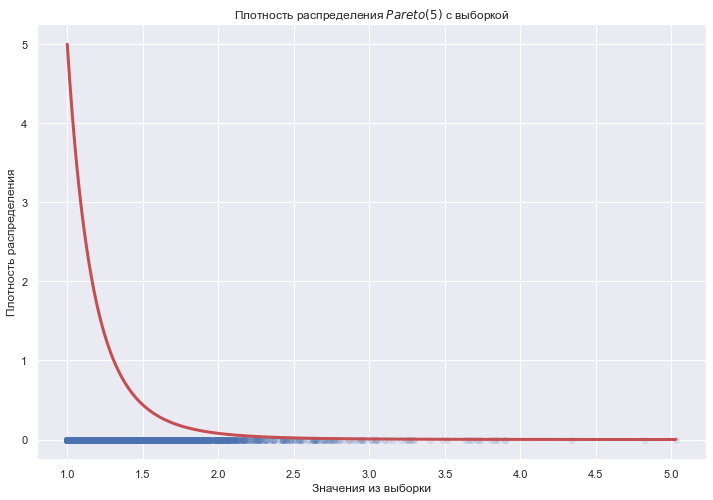

In [20]:
plot_dist_with_sample(pareto5_dist, pareto5_sample, 1000, '$Pareto(5)$')

Для всех $n \leq N$ посчитайте оценку $s^2 = s^2(X_1,\dots, X_N)$ для дисперсии.

In [21]:
def calc_sample_var(sample):
    return (np.cumsum(sample ** 2)) / (np.arange(len(sample)) + 1) - \
           ((np.cumsum(sample) / (np.arange(len(sample)) + 1)) ** 2)

In [22]:
pareto5_sample_var = calc_sample_var(pareto5_sample)
pareto5_sample_var

array([0.        , 0.01212137, 0.02656124, ..., 0.09302429, 0.09301906,
       0.09301488])

Постройте график зависимости модуля разности оценки дисперсии и ее истинного значения от $n$.

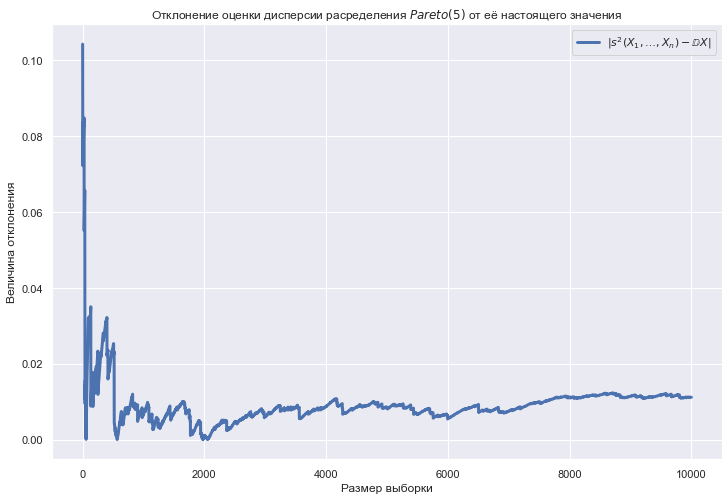

In [23]:
plt.figure(figsize=(12, 8))
plt.plot(
    np.arange(N),
    np.abs(pareto5_sample_var - np.repeat(pareto5_dist.var(), N)),
    lw=3,
    label=r'$|s^2(X_1,\dots,X_n)-\mathbb{D}X|$'
)
plt.title('Отклонение оценки дисперсии расределения $Pareto(5)$ от её настоящего значения')
plt.xlabel('Размер выборки')
plt.ylabel('Величина отклонения')
plt.legend()

Проведите аналогичное исследование для выборки из распределения Коши, где вместо графика модуля разности оценки дисперсии и ее истинного значения (которого не существует) постройте график оценки дисперсии. 


In [24]:
cauchy0_dist = sps.cauchy(0)
cauchy0_sample = cauchy0_dist.rvs(N)

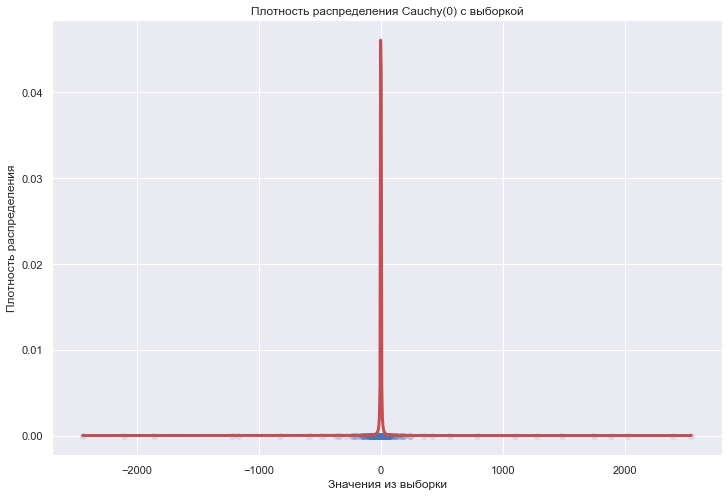

In [25]:
plot_dist_with_sample(
    cauchy0_dist,
    cauchy0_sample,
    1000,
    'Cauchy(0)'
)

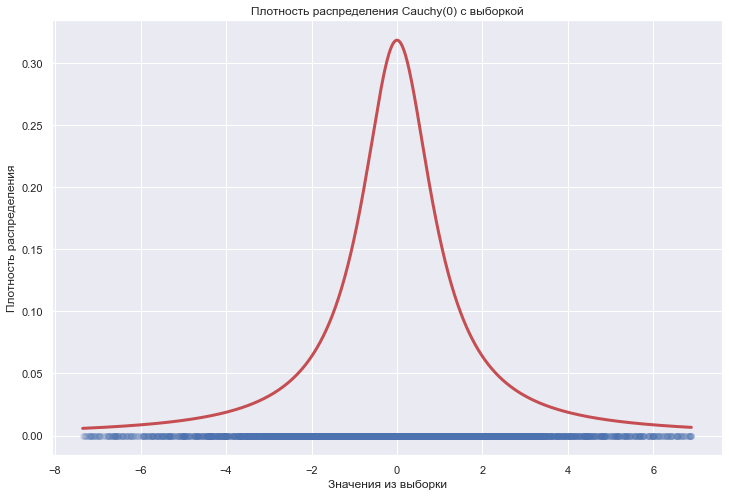

In [26]:
plot_dist_with_sample(
    cauchy0_dist,
    sps.trimboth(cauchy0_sample, 0.04),
    1000,
    'Cauchy(0)'
)

In [27]:
cauchy0_sample_var = calc_sample_var(cauchy0_sample)
cauchy0_sample_var

array([   0.        ,   20.654995  ,   14.54500591, ..., 4954.44216664,
       4953.94734632, 4953.45520781])

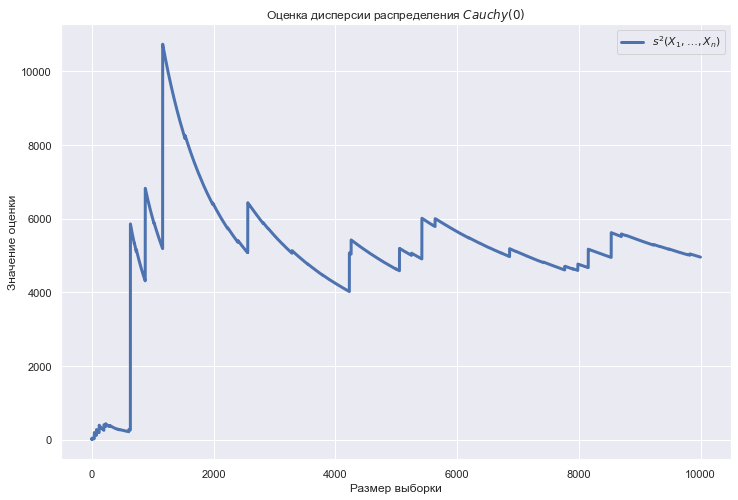

In [28]:
plt.figure(figsize=(12, 8))
plt.plot(
    np.arange(N),
    cauchy0_sample_var,
    lw=3,
    label=r'$s^2(X_1, \dots, X_n)$'
)
plt.title(r'Оценка дисперсии распределения $Cauchy(0)$')
plt.xlabel('Размер выборки')
plt.ylabel('Значение оценки')
plt.legend()

### Задача 4

Сгенерируйте выборку $X_1,\dots, X_N$ из стандартного нормального распределения для $N = 10^4$.

In [29]:
N = 10 ** 4
std_norm_sample = sps.norm.rvs(size=int(N))
std_norm_sample

array([-0.32659693,  0.29293114, -0.22462296, ...,  0.74438819,
        1.19356535,  0.38408355])

Для всех $n \leqslant N$ посчитайте по ней эмпирическую функцию распределения.


In [30]:
from statsmodels.distributions.empirical_distribution import ECDF  # can be useful, but not necessary

ecdfs = [ECDF(std_norm_sample[:i + 1]) for i in range(int(N))]

Для некоторых n (например, $n \in \{10,25,50,100,1000,N\}$ постройте графики эмпирической функции распределения (отметьте на оси абсцисс точки "скачков" кривых, нанеся каждую из "подвыборок" на ось абсцисс на каждом соответствующем графике с коэффициентом прозрачности `alpha=0.2`), нанеся на каждый из них истинную функцию распределения (количество графиков равно количеству различныз значений $n$).

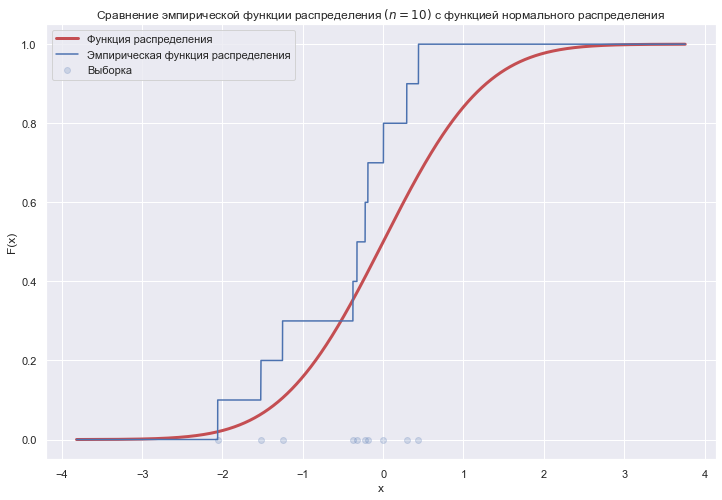

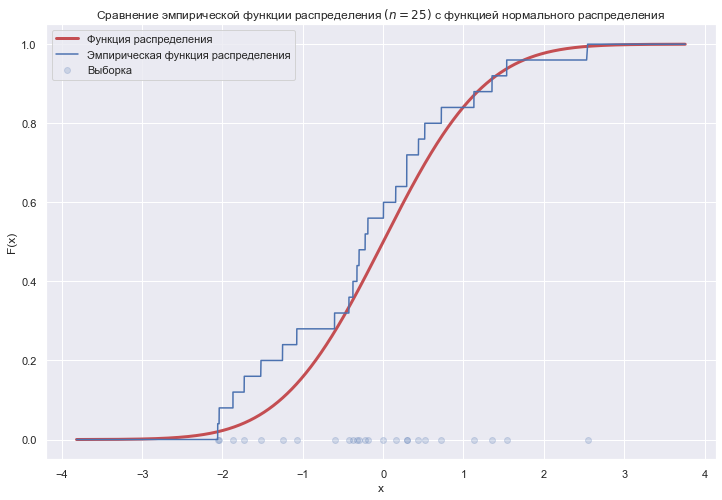

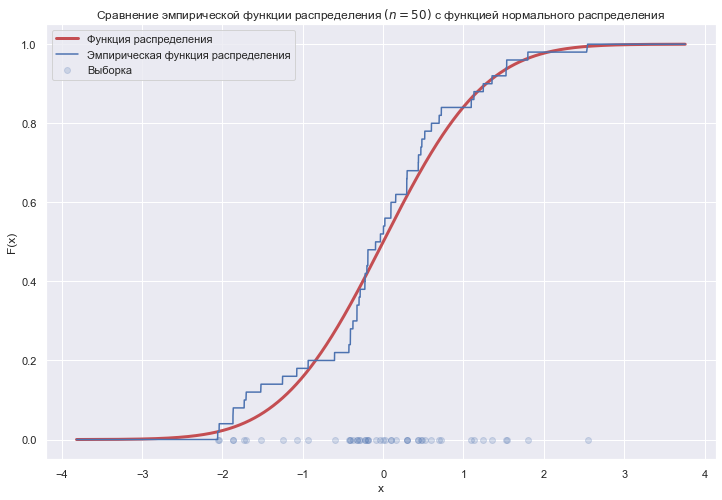

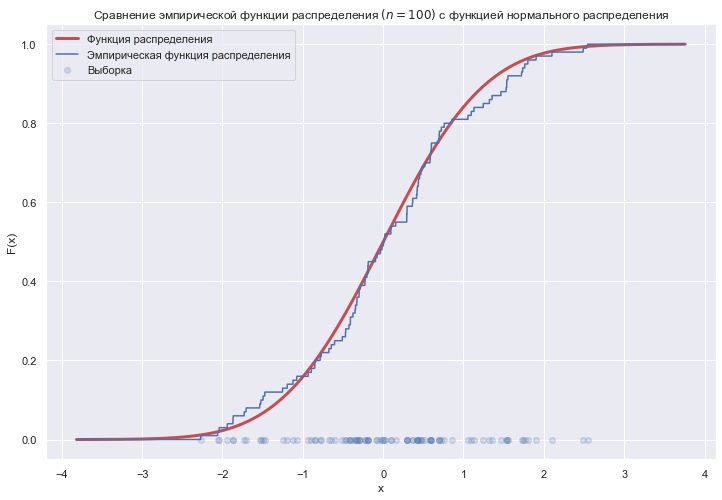

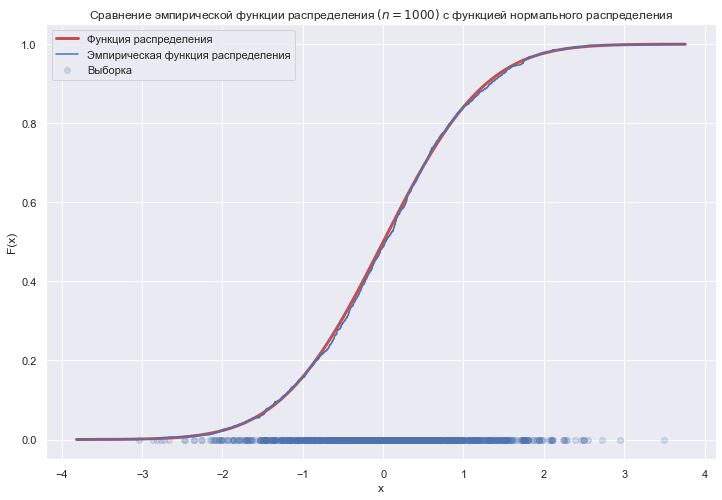

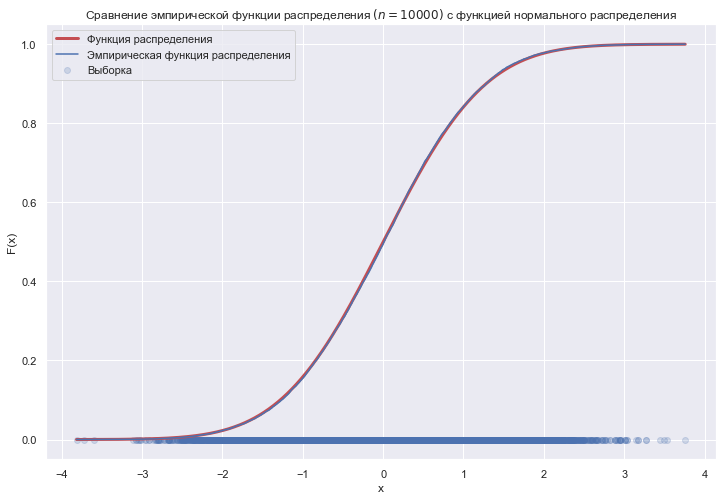

In [31]:
n = [10, 25, 50, 100, 1000, int(N)]
std_norm_sample_sorted = np.sort(std_norm_sample)
for i in n:
    plt.figure(figsize=(12, 8))
    plt.title(
        r'Сравнение эмпирической функции распределения $(n={})$ с функцией нормального распределения'.format(i)
    )
    plt.xlabel('x')
    plt.ylabel('F(x)')
    grid = np.linspace(np.min(std_norm_sample), np.max(std_norm_sample), 10000)
    plt.plot(grid, sps.norm.cdf(grid), color='r', lw=3, label='Функция распределения')
    plt.plot(
        std_norm_sample_sorted,
        list(map(ecdfs[i - 1], std_norm_sample_sorted)),
        label='Эмпирическая функция распределения'
    )
    plt.scatter(
        std_norm_sample[:i],
        np.zeros(i),
        marker='o',
        alpha=0.2,
        label='Выборка'
    )
    plt.legend()

Для всех $n ≤ N$ посчитайте точное значение $D_n = \displaystyle{\sup_{x∈R}} | \hat{F}_n(x)−F(x)|$ и постройте график зависимости статистик $D_n$ и $\sqrt{n}D_n$ от $n$. 


In [32]:
D = [
    np.max(
        np.abs(
            ecdfs[i](std_norm_sample) - sps.norm.cdf(std_norm_sample)
        )
    )
    for i in range(N)
]

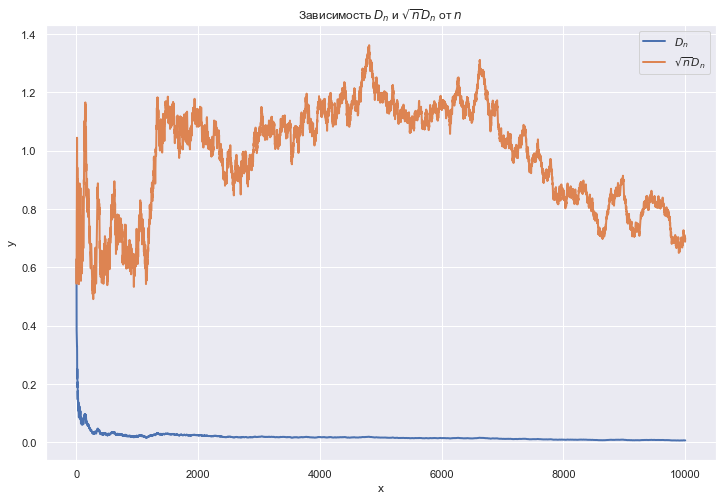

In [33]:
plt.figure(figsize=(12,8))
plt.title(r'Зависимость $D_n$ и $\sqrt{n}D_n$ от $n$')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(
    np.arange(1, N + 1),
    D,
    lw=2,
    label=r'$D_n$'
)
plt.plot(
    np.arange(1, N + 1),
    np.sqrt(np.arange(1, N + 1)) * D,
    lw=2,
    label=r'$\sqrt{n}D_n$'
)
plt.legend()

### Задача 5

Сгенерируйте $N_{\text{samples}}=400$ выборок из равномерного распределения $U_{[0, \theta]} \ \theta=1$ размера $N=40$. Для каждой выборки посчитайте статистики $\hat\theta = 2\overline{X}, \ \theta^* = \frac{n+1}{n} X_{(n)}$. Постройте гистограмму получившихся значений каждой из статистик на одном графике, в качестве параметра `bins` функции `plt.hist` передайте значение ниже, а таккже передайте параметр `alpha=0.6`.

In [34]:
N_samples = 400
N = 40

bins = [i / 40 + 0.8 for i in range(18)]

one_to_n = np.arange(1, N + 1)

theta = 1
u_samples = sps.uniform.rvs(0, theta, size=[N_samples, N])
u_samples

array([[0.17365939, 0.45163403, 0.382949  , ..., 0.53485807, 0.85634614,
        0.88862597],
       [0.21605272, 0.43199408, 0.14802435, ..., 0.62399977, 0.99837701,
        0.94396011],
       [0.22074075, 0.09872516, 0.4260727 , ..., 0.70578142, 0.74248005,
        0.29119284],
       ...,
       [0.90381365, 0.94755282, 0.37805295, ..., 0.7683514 , 0.17887968,
        0.59574396],
       [0.47187615, 0.60286414, 0.96608107, ..., 0.89781396, 0.98765845,
        0.1416442 ],
       [0.27554688, 0.82149069, 0.39493785, ..., 0.16823684, 0.11630878,
        0.83402775]])

In [35]:
theta_hat = 2 * (np.mean(u_samples, axis=1))
theta_star = ((N + 1) / N) * np.max(u_samples, axis=1)

[]

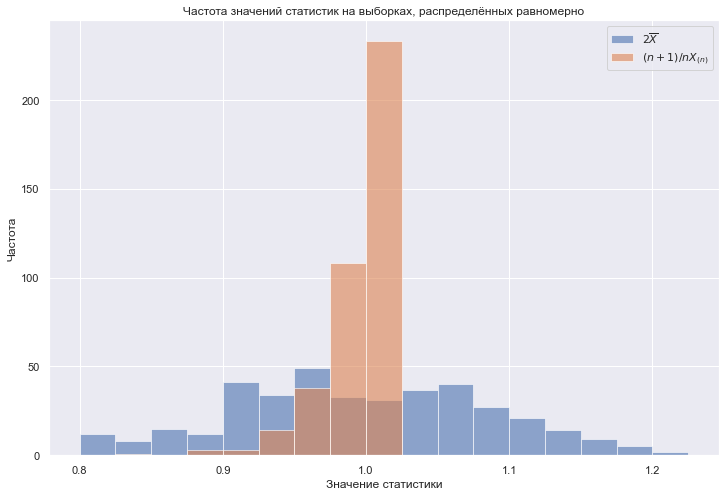

In [36]:
plt.figure(figsize=(12, 8))

plt.title('Частота значений статистик на выборках, распределённых равномерно')
plt.xlabel('Значение статистики')
plt.ylabel('Частота')
plt.hist(theta_hat, bins=bins, alpha=0.6, label='$2\overline{X}$')
plt.hist(theta_star, bins=bins, alpha=0.6, label='$(n+1)/n X_{(n)}$')

plt.legend()
plt.plot()

Постройте гистограммы для статистик $\sqrt{n} (\hat\theta - \theta)$ и $1 - n  (\theta^* - \theta)$

[]

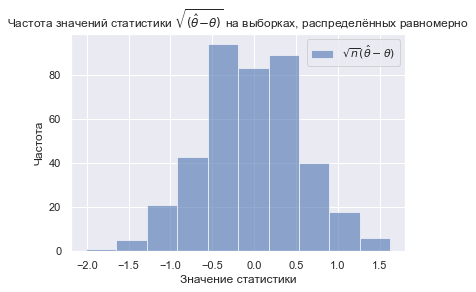

In [37]:
hat_stat = np.repeat(np.sqrt(N), N_samples) * (theta_hat - np.repeat(theta, N_samples))

plt.title(r'Частота значений статистики $\sqrt{(\hat\theta −\theta)}$ на выборках, распределённых равномерно')
plt.xlabel('Значение статистики')
plt.ylabel('Частота')
plt.hist(hat_stat, alpha=0.6, label=r'$\sqrt{n} (\hat\theta - \theta)$')

plt.legend()
plt.plot()

[]

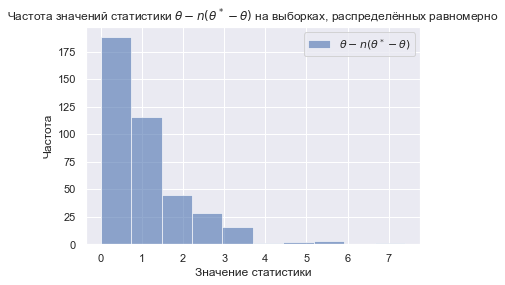

In [38]:
star_stat = 1 - (N * (theta_star - np.repeat(theta, N_samples)))

plt.title(r'Частота значений статистики $\theta - n(\theta^* - \theta)$ на выборках, распределённых равномерно')
plt.xlabel('Значение статистики')
plt.ylabel('Частота')
plt.hist(star_stat, alpha=0.6, label=r'$\theta - n(\theta^* - \theta)$')

plt.legend()
plt.plot()

На какие распределения похожи получившиеся гистограммы?

**Ответ:** распределение $\sqrt{n} (\hat\theta - \theta)$ похоже на нормальное, а $1 - n  (\theta^* - \theta)$ -- на экспоненциальное.

Вспомните чему равен коэффициент $\sigma(\theta)$ для асимптотически нормальной оценки $\hat\theta = 2\overline{X}$ для параметра $\theta$ равномерного распределения в формуле 
$$
\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma(\theta)}} \xrightarrow{d} N(0, 1)
$$.

**Ответ**: $\sigma^2(\theta) = \theta^2/3$

Посчитайте значения статистики
$$\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma(\theta)}}$$
для каждой выборки. Передайте получившиеся значения в переменную `theta_norm`. И запустите ячейку снизу.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


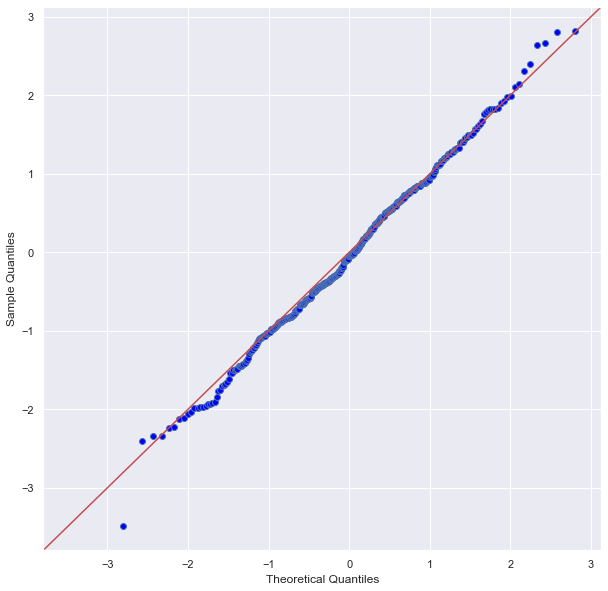

In [39]:
import statsmodels.api as sm


theta_norm = hat_stat / np.repeat(theta / np.sqrt(3), N_samples)
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(theta_norm, line='45', ax=ax)
fig.show()

Для быстрой проверки гипотезы о том, что выборка принадлежит какому-либо распределению часто используется инструмент под названием `QQ-plot` (первые буквы означают `Quantile`). На нем по оси $x$ отложены теоретические значения квантиля, а по оси $y$ -- квантили тестируемой выборки. Очевидно, в идеале такие квантили должны совпадать, поэтому на графике можно увидеть красную линию соответствующую графику функции $y = x$.

Сделайте вывод по графику выше. Можно ли утверждать, что выборка взята из нормального распределения?

**Ответ:** да, можно, потому что почти все точки, соответствующие данным, полученным по выборке, лежат на прямой $y=x$, соответствующей полному совпадению тестируемых данных с теоретическими, а те, которые не лежат на прямой, отклоняются от неё незначительно.

Вернемся к статистике $\theta - n  (\theta^* - \theta)$. Еще раз взгляните на гистограмму, соотвутствующую этой статистике. Попробуйте построить `QQ-plot` для различных распределений (например можно передать в параметр `dist=sps.uniform` в функцию `sm.qqplot` или любое другое из модуля `scipy.stats`). Какое распределение подходит лучше всего?

**Ответ:** лучше всего подходит экспоненциальное распределение.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


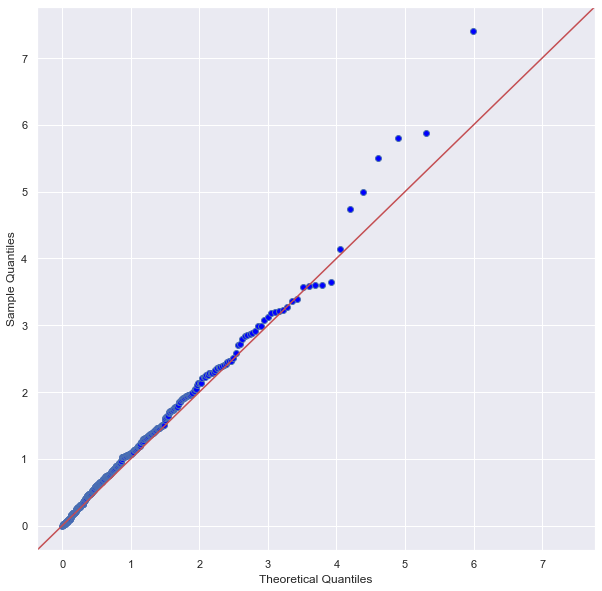

In [40]:
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(star_stat, dist=sps.expon, line='45', ax=ax)
fig.show()

Плохо ли, что оценка $\theta^*$ не асимптотически нормальна? Сделайте вывод о скорости сходимости оценок. Какая из них «выгоднее»?

**Ответ:** то, что оценка $\theta^*$ не асимптотически нормальна плохо, потому что случайные величины, рспределённые нормально, мало отклоняются от математического ожидание. Соответственно, разброс меньше и оценка сходится быстрее, а значит асимптотически нормальная оценка $\hat\theta$ «выгоднее» не асимптотически нормальной $\theta^*$.

**Перед отправкой нажмите `Restart and run all`**. Проверьте, что все работает без ошибок.